In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, f1_score
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("data/SmA-Four-Tank-Batch-Process_V2.csv", delimiter=";")
df["timestamp"] = pd.to_datetime(df["timestamp"])


df["Anomalie"] = (df["DeviationID ValueY"] != 1).astype(int)


df = df[df["CuStepNo ValueY"] == 8]

# Features und Label trennen
drop_cols = ["timestamp", "DeviationID ValueY"]
label_col = "Anomalie"

X_all = df.drop(columns=drop_cols + [label_col])
y_all = df[label_col]

# Train/Test Split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_all, y_all, test_size=0.1, random_state=42, stratify=None,shuffle=False
)


X_train = X_train_full[y_train_full == 0].values

# Testdaten
X_test = X_test.values
y_test = y_test.values
y_train = y_train_full.values



In [ ]:
isf = IsolationForest(random_state=14)
isf.fit(X_train)


y_pred = isf.predict(X_test)


# IsoForest:  1 = Normal, -1 = Anomalie
# Ihr Label:  0 = Normal,  1 = Anomalie
# Wir müssen also invertieren: -1 wird zu 1, 1 wird zu 0.
preds_test = np.where(y_pred == -1, 1, 0)

# --- 5. Berechnung der Metriken ---
ap = average_precision_score(y_test, preds_test)
accuracy = accuracy_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)


print(f"Precision : {ap:.4f}")
print(f"Accuracy:               {accuracy:.4f}")
print(f"Recall:                 {recall:.4f}")
print(f"F1 Score:               {f1:.4f}")

Average Precision : 0.9723
Accuracy:               0.2650
Recall:                 0.2448
F1 Score:               0.3921


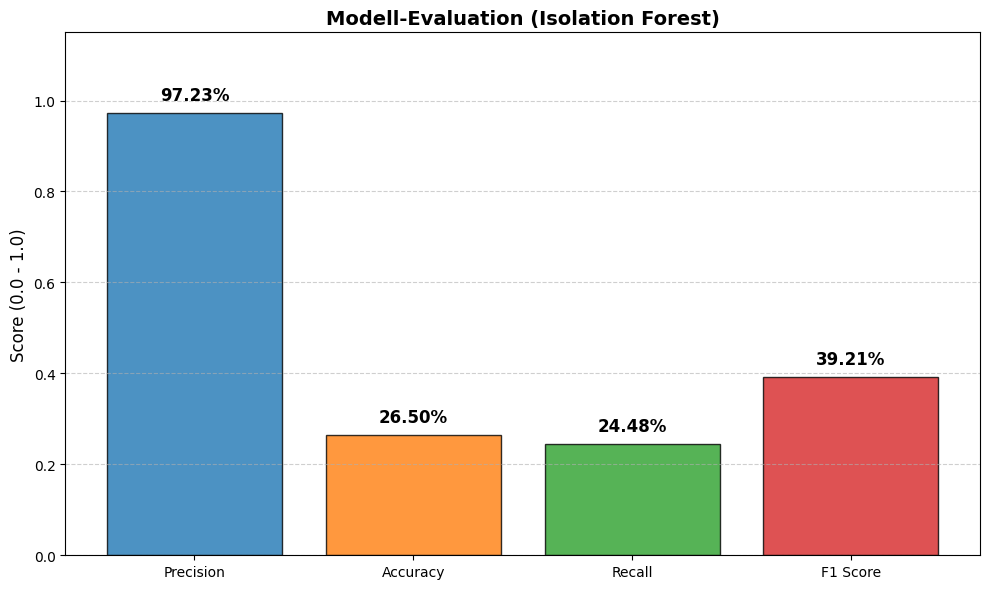

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns # Optional für schönere Farben

metrics_names = ['Precision', 'Accuracy', 'Recall', 'F1 Score']
metrics_values = [ap, accuracy, recall, f1]

plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 
bars = plt.bar(metrics_names, metrics_values, color=colors, alpha=0.8, edgecolor='black')

plt.ylim(0, 1.15)  
plt.ylabel('Score (0.0 - 1.0)', fontsize=12)
plt.title('Modell-Evaluation (Isolation Forest)', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-Position (Mitte des Balkens)
        height + 0.02,                      # Y-Position (etwas über dem Balken)
        f'{height:.2%}',                    # Text (als Prozent formatiert)
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold',
        color='black'
    )


plt.tight_layout()
plt.show()